In [1]:
!pip install \
   pandas matplotlib numpy \
   nltk seaborn sklearn gensim pyldavis \
   wordcloud textblob spacy textstat

     |████████████████████████████████| 1.6MB 4.3MB/s 
     |████████████████████████████████| 102kB 9.1MB/s 
     |████████████████████████████████| 1.9MB 22.5MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=0c2545f16a5a4b2e5a6830ee764b5bd8b7469b04636b7dba17681751d9786d11
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [2]:
!cp -r drive/My\ Drive/recam/original_data/* .

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

import gensim
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
data = pd.read_csv('Task1_train.csv')
data.head(5)

,article,question,option_0,option_1,option_2,option_3,option_4,label
0,The Trainspotting author has agreed to become ...,Irvine Welsh is to spearhead a campaign aimed ...,neglected,renewed,lavish,revised,proposed,0
1,The economy of the 28-nation EU is set to grow...,The economic recovery within the European Unio...,special,fair,remarkable,modest,similar,3
2,"The facility, based on the town's Crichton est...",Councillors are to be given a progress report ...,temporary,controversial,lasting,national,special,3
3,The Scottish golf club said a recent consultat...,"Royal Troon members have voted "" overwhelmingl...",special,past,forthcoming,potential,prestigious,0
4,Former Aberdeen and Manchester United manager ...,Sir Alex Ferguson and Annie Lennox are among t...,latest,free,best,major,famous,4


# Named Entity Recognition

In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [6]:
# sentence = "Two bombs ripped through the Kuta area of the Indonesian tourist @placeholder of Bali on 12 October 2002 , leaving 202 people dead . Among those killed at Paddy \'s Irish Bar and the nearby Sari Club were people from 21 countries , including 88 Australians , 38 Indonesians and 28 Britons."
# doc = nlp(sentence) 
# print(doc.ents)
# # for token in doc: 
# #   print(token, token.pos_) 
# for token in doc: 
#   print(token, token.pos_) 

In [7]:
# # nouns = " ".join([token.orth_ for token in doc if token.pos_ =='NOUN'])
# # nouns
# for np in doc.noun_chunks:
#     print(np.text)

In [8]:
# sentence = "When @placeholder Olympic flyweight boxing champion Nicola Adams steps into the ring at Rio 2016 she will know exactly which tactics to deploy to ensure that she wins every fight ."
# doc = nlp(sentence) 
# print(doc.ents)
# for token in doc: 
#   print(token, token.pos_) 

In [9]:
# import spacy 
  
# nlp = spacy.load('en_core_web_sm') 
  
# sentence = "apple is looking at buying U.K. startup for $1 billion"
  
# doc = nlp(sentence) 
# print(doc.ents)
# # for ent in doc.ents: 
# #     print(ent.text, ent.start_char, ent.end_char, ent.label_) 

In [10]:
# ner_data = pd.read_csv('data/Task1/train/Task1_train.csv')
# ner_data.head(5)

In [11]:
# text = ner_data['article'][41]
# text

In [12]:
# q = data['question'][41]
# q

In [13]:
# print(ner_data['option_0'][128], ner_data['option_1'][128], ner_data['option_2'][128], ner_data['option_3'][128], ner_data['option_4'][128])

In [14]:


# text_data = ner_data['article'][4]

# document = nlp(text_data)

# text_no_namedentities = []

# ents = [e.text for e in document.ents]
# for item in document:
#     if item.text in ents:
#         pass
#     else:
#         text_no_namedentities.append(item.text)
# print(" ".join(text_no_namedentities))

In [15]:
# text_data = ner_data['article'][2]
# document = nlp(text_data)
# print(" ".join([ent.text for ent in document if ent.ent_type_!='PERSON']))

In [16]:
# doc = nlp(text)
# for ent in doc.ents:
#     print(ent.text, ent.start_char, ent.end_char, ent.label_)   

In [17]:
# def ner(text_data):
#     document = nlp(text_data)
#     new_text = " ".join([ent.text for ent in document if ent.ent_type_!='PERSON' and ent.ent_type_!='DATE' and ent.ent_type_!='TIME'])
#     return new_text

In [18]:
# data['article'] = data['article'].apply(ner)

In [19]:
# data['article'][128]

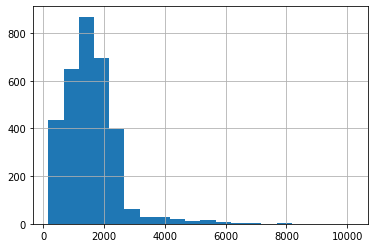

In [20]:
data['article'].str.len().hist(bins = 20)

The histogram shows that news headlines range from 10 to 70 characters and generally, it is between 25 to 55 characters.

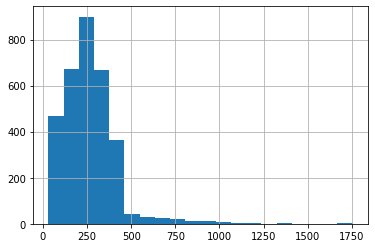

In [21]:
data['article'].str.split().\
    map(lambda x: len(x)).\
    hist(bins = 20)

It is clear that the number of words in news headlines ranges from 2 to 12 and mostly falls between 5 to 7 words.

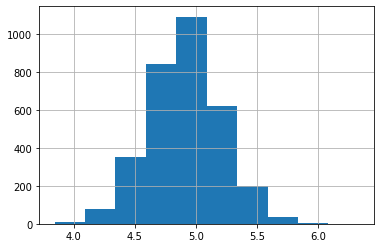

In [22]:
data['article'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [23]:
data.article.map(lambda x: len(x)).max()
data['article'].str.len().max()

10177

In [24]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


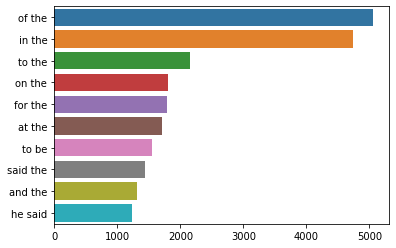

In [25]:
top_n_bigrams=get_top_ngram(data['article'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

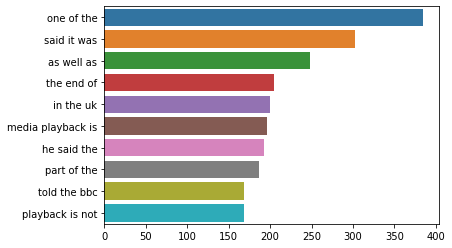

In [26]:
top_n_trigrams=get_top_ngram(data['article'],3)[:10]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

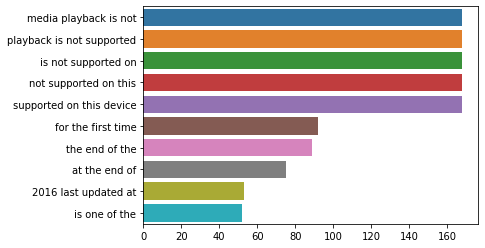

In [27]:
top_n_quadgrams=get_top_ngram(data['article'],4)[:10]
x,y=map(list,zip(*top_n_quadgrams))
sns.barplot(x=y,y=x)

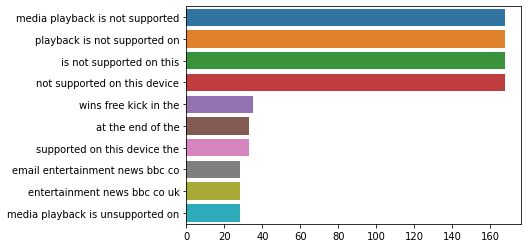

In [28]:
top_n_pentagrams=get_top_ngram(data['article'],5)[:10]
x,y=map(list,zip(*top_n_pentagrams))
sns.barplot(x=y,y=x)

    The average word length ranges between 3 to 9 with 5 being the most common length. Does it mean that people are using really short words in news headlines?

In [29]:
remove_words = ['Mr.', 'Mr', 'Mrs.', 'Mrs', 'said', 'bbc', 'said:', 'said.', 'said,', 'said:"', 'said."', 'said,"', 'we re', 'we ve', 'told', \
                'Media playback is not supported on this device', 'Media playback is not supported on this device.', \
                'Media playback supported device', 'Media playback supported device.', '\'Media playback supported device', \
                'media playback unsupported device', 'Media playback is unsupported on your device', \
                'Follow us on Facebook , on Twitter @BBCNewsEnts , or on Instagram at newsents . If you have a story suggestion email entertainment.news@.co.uk .', \
                'Follow us on Twitter @BBCNewsEnts , on Instagram , or if you have a story suggestion email entertainment.news@.co.uk .', \
                'Follow us on @BBCNewsEnts , on Instagram at newsents , or if you have a story suggestion email entertainment.news@.co.uk', \
                'Follow us on @BBCNewsEnts , on Instagram , or if you have a story suggestion email entertainment.news@.co.uk', \
                'Last updated at', 'Subscribe to the BBC Sport newsletter to get our pick of news , features and video sent to your inbox .']
for i in remove_words:
    data['article'] = data['article'].str.replace(i, '')

In [30]:
data['article'] = data['article'].str.replace('media playback supported device', '')

In [31]:
df = data[data['article'].str.contains("newsletter")]
df['article']

452     Trump has  he would ban Muslims from entering ...
701     Gray, 25, originally had until Wednesday, 31 A...
847      Sweden won 1-0 against South Africa in the op...
862     The Bloomsbury Patient Network provides inform...
870     The sevens squad have been recipients of full-...
1022    The Swans have enquired about Leicester forwar...
1066    Miliband will use a foreign policy speech to c...
1175     It was the first time Mourinho had dropped Ro...
1251     Bravo was making his debut after being brough...
1252    Argentine Hoyos, a former boss of Barcelona B,...
1450     In an error-strewn display, the 2012 bronze m...
1641    The 36-year-old midfielder, who is leaving MLS...
1684    The American top seeds lost 6-3 6-4 to Czech R...
1716    German centre-back Mertesacker, 31, is to miss...
2023     The 20-year-old had a two-stroke lead over So...
2176    European football's governing body confirmed i...
2217    The Under-20 boss replaces Gareth Southgate, w...
2344    Hampsh

In [32]:
data['article'][452]

'Trump has  he would ban Muslims from entering the US and that a wall would be built on the Mexican border. The US hopes to stage the 2024 Olympics in Los Angeles, and the 2026 World Cup either alone or with Mexico. "I didn\'t like any part of the Trump campaign,"  Bradley. "Everything the President does in terms of domestic policy and international relations determines how you are received in all different areas, including sports. "If you want to be optimistic you just have to hope that the responsibilities of the job make a big difference in the way Trump handles himself. Because if you just go by the campaign, for me it was divisive and ugly." The Swansea City manager, who has also managed the Egypt national team as well as Stabaek in Norway and Le Havre in France, has not worked in his home country since his five-year spell as USA boss ended in 2011. Trump\'s comments during his campaign had raised concerns the United States may miss out on staging the Olympics and World Cup. Bradl

In [33]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<BarContainer object of 10 artists>

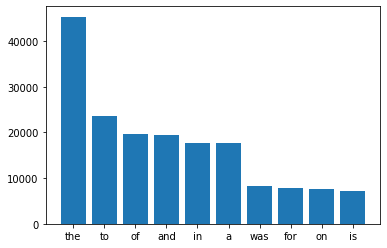

In [34]:
corpus=[]
new= data['article'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

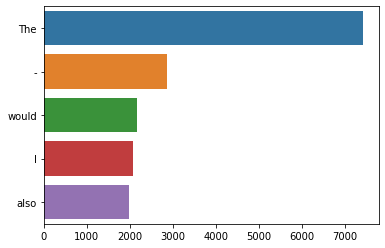

In [35]:
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [36]:
# Add some more stopwords and remove them too
from nltk.corpus import stopwords
stop = stopwords.words('english')
# newStopWords = ['said', 'bbc', 'BBC.', 'BBC:', 'BBC,', 'said:', 'said.', 'said,', 'said:"', 'said."', 'said,"', 'we re', 'we ve', 'told', \
#                 'Media playback is not supported on this device', 'Media playback is not supported on this device.', \
#                 'Media playback supported device', 'Media playback supported device.', '\'Media playback supported device']
# stop.extend(newStopWords)

# stop.append('said')
# stop.append('bbc')
# print(stop)


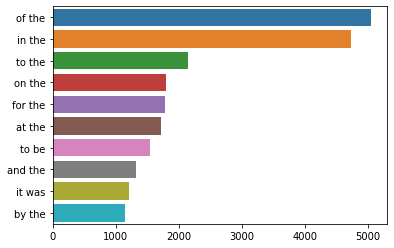

In [37]:
top_n_bigrams=get_top_ngram(data['article'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

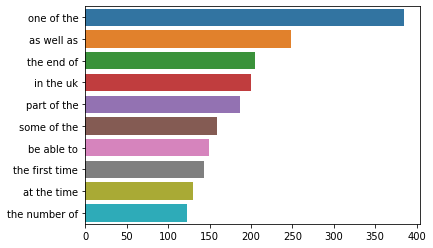

In [38]:
top_n_trigrams=get_top_ngram(data['article'],3)[:10]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

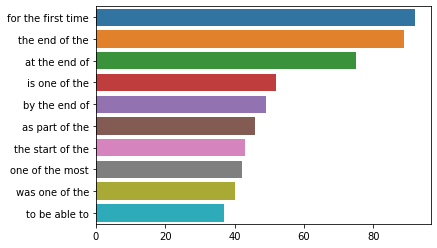

In [39]:
top_n_quadgrams=get_top_ngram(data['article'],4)[:10]
x,y=map(list,zip(*top_n_quadgrams))
sns.barplot(x=y,y=x)

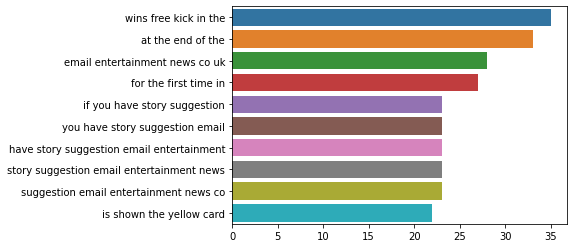

In [40]:
top_n_pentagrams=get_top_ngram(data['article'],5)[:10]
x,y=map(list,zip(*top_n_pentagrams))
sns.barplot(x=y,y=x)

In [41]:
data.to_csv('drive/My Drive/dev_task_2.csv', index = False)

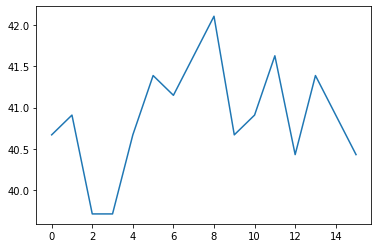

In [42]:
import math
dev = {0: 40.669856459330145,
 1: 40.90909090909091,
 2: 39.712918660287083,
 3: 39.712918660287083,
 4: 40.669856459330145,
 5: 41.38755980861244,
 6: 41.148325358851673,
 7: 41.626794258373206,
 8: 42.105263157894735,
 9: 40.669856459330145,
 10: 40.90909090909091,
 11: 41.626794258373206,
 12: 40.43062200956938,
 13: 41.38755980861244,
 14: 40.90909090909091,
 15: 40.43062200956938}

# for k in dev:
#   dev[k] = 100*dev[k]

import matplotlib.pyplot as plt
import numpy as np

y = list(dev.values())[:16]
xpoints = np.array(list(dev.keys())[:16])
ypoints = np.array(list(dev.values())[:16])
# yint = range(39,43, 1)

# plt.yticks(yint)
plt.plot(xpoints, ypoints)
plt.show()